# Week 1 数据整理与可视化

# 目录

- 数据预处理
    - 审核
    - 筛选
    - 排序
    - 数据透视表
- 品质数据的整理与展示
    - 分类数据
    - 顺序数据
- 数值型数据的整理与展示

In [1]:
# 导入常用包
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号



# 数据预处理
- 审核
- 筛选
- 排序
- 数据透视表

## 审核

### 原始数据(raw data)

1. 完整性审核
- 调查单位或个体是否存在遗漏(数据框中的'行'是否少了)
- 所调查项目或变量是否存在遗漏(数据框中的'列'是否少了)

2. 准确性审核
- 是否反映真实情况
- 是否有错误

### 二手数据(second-hand data)
1. 适用性
- 数据来源、口径和相关背景资料
- 符合需求
2. 时效性审核
- 使用最新数据
3. 是否需要进一步加工整理

## 筛选

当数据错误无法纠正或符合要求而无法弥补，则需要筛选

- 剔除不符合要求的数据
- 按某种特定条件筛选

### pandas实现数据筛选
`df.loc[condition,['column_name']]`

In [2]:
# 读取 例3.1
df3_1=pd.read_excel('例题数据/例3.1.xlsx')
df3_1

,姓名,统计学成绩,数学成绩,英语成绩,经济学成绩
0,张松,69,68,84,86
1,王翔,91,75,95,94
2,田雨,54,88,67,78
3,李华,81,60,86,64
4,赵颖,75,96,81,83
5,宋媛,83,72,66,71
6,袁方,75,58,76,90
7,陈风,87,76,92,77


In [7]:
# 筛选'统计学成绩'前4名学生的'姓名'和'统计学成绩'
df3_1.loc[df3_1['统计学成绩'].nlargest(4).index,['姓名','统计学成绩']]

,姓名,统计学成绩
1,王翔,91
7,陈风,87
5,宋媛,83
3,李华,81


In [9]:
# 筛选'统计学成绩'低于80分学生的'姓名'和'统计学成绩'
df3_1.loc[df3_1['统计学成绩']<80,['姓名','统计学成绩']]

,姓名,统计学成绩
0,张松,69
2,田雨,54
4,赵颖,75
6,袁方,75


## 排序
- 分类数据
    - 字母型
    - 汉字型
        - 拼音
        - 笔画
- 数值型
 - 递增
 - 递减
 
### pandas实现数据排序
`df.sort_values(by='column_name',ascending=True)`

In [10]:
# 按'统计学成绩'递减排序
df3_1.sort_values(by='统计学成绩',ascending=False)

,姓名,统计学成绩,数学成绩,英语成绩,经济学成绩
1,王翔,91,75,95,94
7,陈风,87,76,92,77
5,宋媛,83,72,66,71
3,李华,81,60,86,64
4,赵颖,75,96,81,83
6,袁方,75,58,76,90
0,张松,69,68,84,86
2,田雨,54,88,67,78


## 数据透视表(pivot table)

数据透视表可以对数据表重要的信息按需求进行汇总，形成一个符合要求的交叉表。在利用透视表时，原数据表中首行必须有列标题。

In [2]:
# 读取 例3.2
df3_2=pd.read_excel('例题数据/例3.2.xlsx')
df3_2.head()

,编号,性别,家庭所在地区,平均月生活费(元),月平均衣物支出(元),买衣物首选因素
0,1,男,大型城市,800,200,价格
1,2,女,中小城市,600,180,款式
2,3,男,大型城市,1000,300,品牌
3,4,男,中小城市,400,40,价格
4,5,女,中小城市,500,150,款式


## pandas实现数据透视表

`pd.pivot_table()`
- `data`:输入的Dataframe
- `values`:optional, 需要汇总的列
- `index`:用作索引的列, 每个pivot table必须有一个Index
- `columns`: optional, 根据所选的columns对汇总的特征进行进一步分割

In [23]:
# 没有columns
pd.pivot_table(df3_2,values=['平均月生活费(元)','月平均衣物支出(元)'],
              index='家庭所在地区',aggfunc=np.mean)

,平均月生活费(元),月平均衣物支出(元)
家庭所在地区,,
中小城市,621.428571,151.071429
乡镇地区,633.333333,103.333333
大型城市,590.000000,156.000000


In [25]:
# 将'性别'设置成columns, 对原有的pivot table的特征(columns)进一步分割
pd.pivot_table(df3_2,values=['平均月生活费(元)','月平均衣物支出(元)'],columns='性别',
              index='家庭所在地区',aggfunc=np.mean)

平均月生活费(元)              月平均衣物支出(元)            
性别               女           男           女           男
家庭所在地区                                                
中小城市    528.571429  714.285714  113.571429  188.571429
乡镇地区    600.000000  650.000000  100.000000  105.000000
大型城市    550.000000  650.000000  146.666667  170.000000

# 品质数据的整理与可视化
## 分类数据

分类数据整理

- 频数:落在各类别中的数据个数
- 比例:某一类别数据个数的比值
- 百分比
- 比率:不同类别数值个数的比值

### pandass实现频数分布表(cross tab)

`pd.crosstab()`

- `index`: 行汇总分类数据频数
- `columns`:列汇总分类数据频数
- `margins`:optional bool, 边缘总频率汇总, default to `False`

In [13]:
df3_3=pd.read_excel('例题数据/例3.3.xlsx')
df3_3.head()

,顾客性别,饮料类型
0,女,碳酸饮料
1,男,绿茶
2,男,矿泉水
3,女,矿泉水
4,男,碳酸饮料


In [14]:
pd.crosstab(df3_3['饮料类型'],df3_3['顾客性别'])

顾客性别,女,男
饮料类型,,
其他,6,2
果汁,5,1
矿泉水,4,6
碳酸饮料,9,6
绿茶,4,7


In [34]:
pd.crosstab(df3_3['饮料类型'],df3_3['顾客性别'],margins=True,margins_name='total')

顾客性别,女,男,total
饮料类型,,,
其他,6,2,8
果汁,5,1,6
矿泉水,4,6,10
碳酸饮料,9,6,15
绿茶,4,7,11
total,28,22,50


In [35]:
pd.crosstab(df3_3['顾客性别'],df3_3['饮料类型'],margins=True)

饮料类型,其他,果汁,矿泉水,碳酸饮料,绿茶,All
顾客性别,,,,,,
女,6,5,4,9,4,28
男,2,1,6,6,7,22
All,8,6,10,15,11,50


In [15]:
# 构造频数分布表
freq_table=pd.crosstab(index=df3_3['饮料类型'],columns=df3_3['顾客性别'],margins=True)
# 分布百分比
freq_table/len(df3_3)*100

顾客性别,女,男,All
饮料类型,,,
其他,12.0,4.0,16.0
果汁,10.0,2.0,12.0
矿泉水,8.0,12.0,20.0
碳酸饮料,18.0,12.0,30.0
绿茶,8.0,14.0,22.0
All,56.0,44.0,100.0


## 分类数据可视化

- 条形图
- 帕累托图
- 饼图

### 条形图

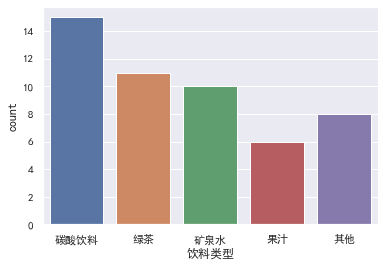

In [46]:
sns.countplot(data=df3_3,x='饮料类型')

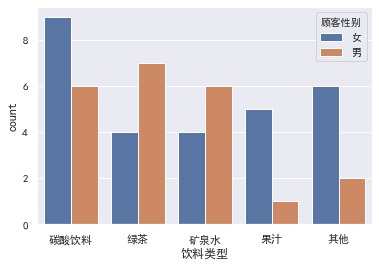

In [45]:
sns.countplot(data=df3_3,x='饮料类型',hue='顾客性别')

#### challenge: 堆积条形图

[参考点这里](https://www.matplotlib.org.cn/gallery/lines_bars_and_markers/bar_stacked.html)

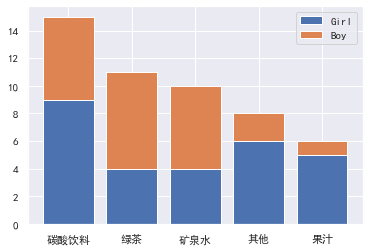

In [103]:
ind=freq_table.index.to_list()

p1=plt.bar(ind,freq_table['女'])
# 第二个bar一定要设置bottom=第一个变量
p2=plt.bar(ind,freq_table['男'],bottom=freq_table['女'])
plt.legend((p1[0],p2[0]),('Girl','Boy'))

In [16]:
freq_table

顾客性别,女,男,All
饮料类型,,,
其他,6,2,8
果汁,5,1,6
矿泉水,4,6,10
碳酸饮料,9,6,15
绿茶,4,7,11
All,28,22,50


In [18]:
# 删除最后一行All
freq_table=freq_table.iloc[:-1,:]
freq_table=freq_table.sort_values(by='All',ascending=False)
freq_table['cumsum']=freq_table['All'].cumsum()
freq_table

顾客性别,女,男,All,cumsum
饮料类型,,,,
碳酸饮料,9,6,15,15
绿茶,4,7,11,26
矿泉水,4,6,10,36
其他,6,2,8,44
果汁,5,1,6,50


### 帕累托图
- 按各类别数据出现的频数多少排序后绘制的柱形图
- 展示分类数据分布

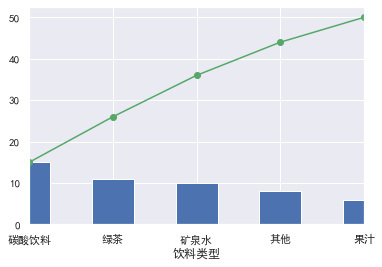

In [19]:
freq_table['All'].plot(kind='bar')
freq_table['cumsum'].plot(style='-o',c='g')

### 饼图
- 用于表示样本中组成各部分的比例
- 样本中所占的百分比用园内的各个扇形图角度表示

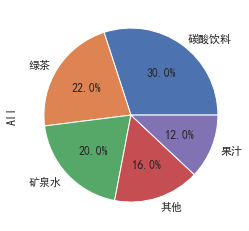

In [63]:
# autopct显示百分比格式
freq_table['All'].plot(kind='pie',autopct='%1.1f%%')

#### challenge: 双饼图绘制


[Text(0.5, 1.0, 'Pie plot with `ax.pie`'), None]

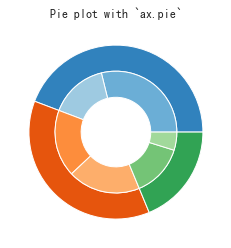

In [20]:
# 官网样例
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')

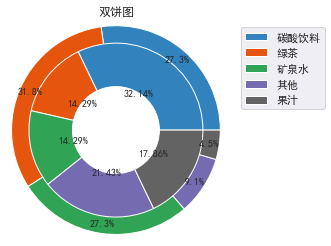

In [24]:
# 要画双饼图，无法直接使用plt.pie
# 需要用fig,ax=subplots方法
# 操作pie(radius参数)进行其中一个饼图的绘制
vals1 = freq_table['男']
vals2 = freq_table['女']

cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(5)*4)

labels=freq_table.index.tolist()
fig, ax = plt.subplots()
# 'wedgeprops'实现空心饼图
ax.pie(vals1, radius=1.2,autopct='%1.1f%%',pctdistance=0.9,colors=colors,wedgeprops=dict(width=.5,edgecolor='w'))
ax.pie(vals2, radius=1,autopct='%1.2f%%',pctdistance=.5,colors=colors,wedgeprops=dict(width=.5,edgecolor='w'))
ax.set(aspect="equal", title='双饼图')
plt.legend(labels,loc='best',bbox_to_anchor=(1.05,1))

e:\python\python37\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


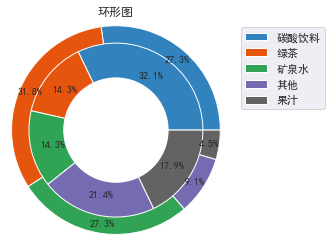

In [25]:
# 另一种实现空心饼图的方法
# vals3是第三个ax的占位变量, 用于挖空中心
vals3=1
labels=freq_table.index.tolist()
fig, ax = plt.subplots()
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(5)*4)

ax.pie(vals1, radius=1.2,autopct='%1.1f%%',pctdistance=0.9,colors=colors)
ax.pie(vals2, radius=1,autopct='%1.1f%%',pctdistance=.75,colors=colors)
# 最内层显示白色
ax.pie(vals3, radius=0.6,colors='w')
ax.set(aspect="equal", title='环形图')
plt.legend(labels,loc='best',bbox_to_anchor=(1.05,1))

## 顺序数据

- 累积频数:各类别频数逐级累加
- 累积频率(累积百分比): 各类别频率逐级累加

### pandas实现

In [28]:
# 原始数据集不好导入，这里直接生成一个
df3_5=pd.DataFrame({
    'answer':['very unsatisfied','unsatisfied','neutral','satisfied','very satisfied'],
    'counts':np.random.randint(20,100,5) # 随机生成20-100个整数，与原文数据不一样
})
df3_5

,answer,counts
0,very unsatisfied,30
1,unsatisfied,74
2,neutral,37
3,satisfied,82
4,very satisfied,23


In [49]:
# 生成百分比
df3_5['percent']=df3_5['counts']/df3_5.counts.sum()*100
df3_5.percent=df3_5.percent.apply(round)

# 向上累积
df3_5['cumsum_asc']=np.cumsum(df3_5.counts)
df3_5['cumsum_asc_percent']=np.cumsum(df3_5.percent)

# 向下累积
df3_5['cumsum_desc']=df3_5.cumsum_asc.sort_values(ascending=False).tolist()
df3_5['cumsum_desc_percent']=df3_5.cumsum_asc_percent.sort_values(ascending=False).tolist()

df3_5

,answer,counts,percent,cumsum_asc,cumsum_asc_percent,cumsum_desc,cumsum_desc_percent
0,very unsatisfied,30,12,30,12,246,99
1,unsatisfied,74,30,104,42,223,90
2,neutral,37,15,141,57,141,57
3,satisfied,82,33,223,90,104,42
4,very satisfied,23,9,246,99,30,12


[Text(0, 0, 'very unsatisfied'),
 Text(0, 0, 'unsatisfied'),
 Text(0, 0, 'neutral'),
 Text(0, 0, 'satisfied'),
 Text(0, 0, 'very satisfied')]

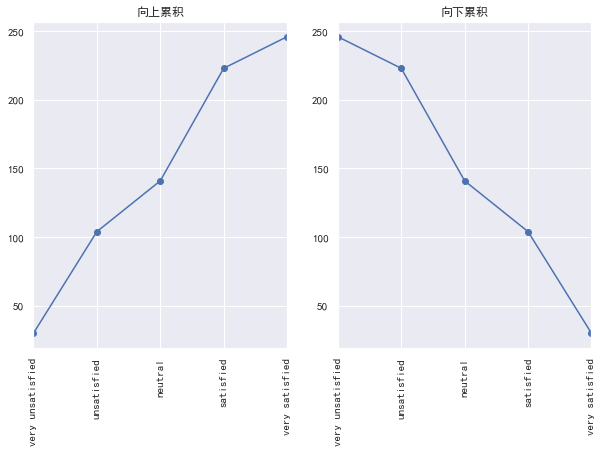

In [62]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
df3_5.cumsum_asc.plot(ax=ax[0],marker='o')
df3_5.cumsum_desc.plot(ax=ax[1],marker='o')
ax[0].set_title('向上累积')
ax[1].set_title('向下累积')
ax[0].set_xticklabels(df3_5.answer,rotation=90)
ax[1].set_xticklabels(df3_5.answer,rotation=90)

# 数值型数据整理与可视化
- 数据分组
- 可视化

## 数据分组
1. 将变量值的一个区域作为一个组
2. 适用于连续变量，且变量较多
3. 遵循'不重不漏'原则
4. 等距分组 VS 不等距分组

分组步骤：
1. 确定组数
2. 确定组距
$$
组距=\frac{max-min}{组数}
$$
3. 统计出各组频数并整理成频数分布表

### 用pandas制作频数分布表
`pd.cut()`

- `bins`: 分组参数，int平均分组，list自定区间分组
- `right`: 右边是否为闭区间

In [63]:
df3_6=pd.read_excel('例题数据/例3.6.xlsx')
df3_6.head()

,销售量
0,234
1,143
2,187
3,161
4,150


In [74]:
bins_data=pd.cut(df3_6['销售量'],bins=[i for i in range(140,240,10)],right=False).value_counts().sort_index()
bins_counts=bins_data.values
bins_df=pd.DataFrame({
    '频数':bins_counts,
    '频率':bins_counts/np.sum(bins_counts)
},index=bins_data.index)
bins_df

,频数,频率
"[140, 150)",4,0.034783
"[150, 160)",9,0.078261
"[160, 170)",16,0.139130
"[170, 180)",27,0.234783
"[180, 190)",20,0.173913
"[190, 200)",17,0.147826
"[200, 210)",10,0.086957
"[210, 220)",8,0.069565
"[220, 230)",4,0.034783


## 数值型数据可视化
- 分组数据
    - 直方图(histogram)
    - 茎叶图(stem)
- 未分组数据
    - 箱线图(box)
- 时间序列
    - 线图(line)
- 多变量
 - 散点图
 - 气泡图
 - 雷达图

### 分组数据：直方图
- 用矩形的宽度和高度表示频数分布（本质上是矩形的面积）
- 在直角坐标系中，用横轴表示数据分组，纵轴表示频数或频率，各组与相应频数就形成了一个矩形

#### pandas实现直方图
`ser.hist()`

- `bins`:分箱参数

([<matplotlib.axis.XTick at 0x18e05b5eb48>,
 <a list of 10 Text xticklabel objects>)

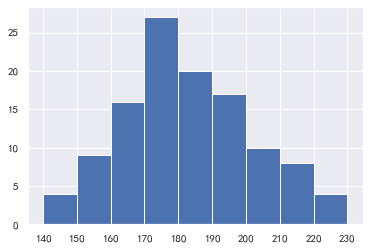

In [80]:
df3_6['销售量'].hist(bins=[i for i in range(140,240,10)])
plt.xticks([i for i in range(140,240,10)])

#### seaborn实现频数分布直方图

更简单的方法
`sns.distplot()`

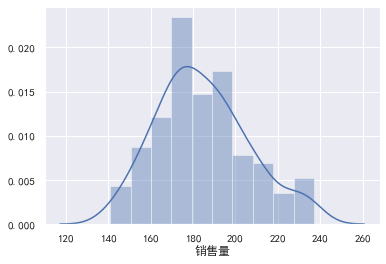

In [81]:
sns.distplot(df3_6['销售量'])

### 茎叶图

[茎叶图解释](https://www.cnblogs.com/gispathfinder/p/5770080.html)

#### python实现茎叶图

In [82]:
from itertools import groupby

nums=df3_6['销售量'].tolist()
for k, g in groupby(sorted(nums2), key=lambda x: int(x) // 10):
    lst = map(str, [int(y) % 10 for y in list(g)])
    print (k, '|', ' '.join(lst))

18 | 5 5
19 | 5
20 | 0 0 6
21 | 0 5 7
22 | 0 0 0 5 5 5 5 7
23 | 0 2 2 5 6
24 | 0 0 0 5 5
25 | 2
27 | 0 1


### 箱线图
- 显示未分组的原始数据
- 由一组数据的5个特征值(min,25%,median,75%,max)组成，由一个箱子和两条线段组成

([<matplotlib.axis.XTick at 0x18e08f82e48>,
 <a list of 4 Text xticklabel objects>)

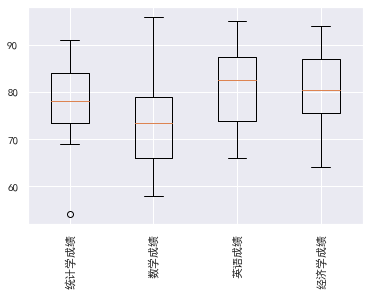

In [95]:
# 每门课成绩的箱线图
course_name=['统计学成绩','数学成绩','英语成绩','经济学成绩']
plt.boxplot(df3_1[course_name].T)
plt.xticks(range(1,5),labels=course_name,rotation=90)

([<matplotlib.axis.XTick at 0x18e08e04c88>,
 <a list of 8 Text xticklabel objects>)

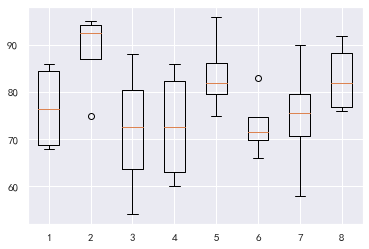

In [99]:
# 每名学生成绩的箱线图
plt.boxplot(df3_1.iloc[:,1:])
plt.xticks(range(1,9))

### 时间序列数据-线图
- 表示时间序列数据趋势
- 时间一般绘制在横轴，数据绘制在纵轴

In [107]:
df3_8=pd.read_excel('例题数据/例3.8.xlsx',index_col=0)
df3_8

,农村城镇消费水平,城镇居民消费水平
年份,,
2006,3066,10739
2007,3538,12480
2008,4065,14061
2009,4402,15127
2010,4941,17104
2011,6187,19912
2012,6964,21861
2013,7773,23609
2014,8711,25424


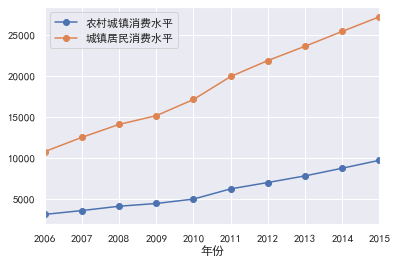

In [108]:
df3_8.plot(style='-o')

### 散点图
- 用于表示两变量之间的关系

In [109]:
df3_9=pd.read_excel('例题数据/例3.9.xlsx')
df3_9

,温度,降雨量,产量
0,6,25,2250
1,8,40,3450
2,10,58,4500
3,13,68,5750
4,14,110,5800
5,16,98,7500
6,21,120,8250


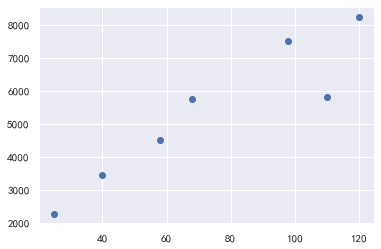

In [112]:
plt.scatter(df3_9['降雨量'],df3_9['产量'])

### 三变量之间关系-气泡图
- 图中气泡大小依赖于第三个变量

Text(0, 0.5, '温度')

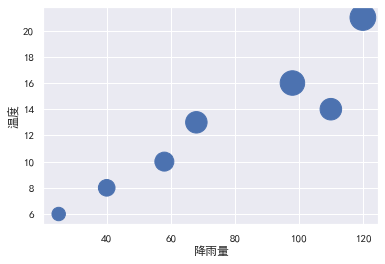

In [123]:
plt.scatter(df3_9['降雨量'],df3_9['温度'],s=df3_9['产量']*.08)
plt.xlabel('降雨量')
plt.ylabel('温度')

### 雷达图

- 显示多变量的图示方法
- 用于对比各变量的数值总和时十分有用
- 假定各变量的取值具有相同正负号，总的绝对值与图形所围成的区域成正比
- 适合研究多个样本之间的相似度

#### matplotlib实现雷达图
[用matplotllib绘制雷达图](https://zhuanlan.zhihu.com/p/37104717)



In [142]:
df3_4=pd.read_excel('例题数据/例3.4.xlsx',skiprows=1,index_col=0)
df3_4.T

地区,北京,天津,上海,重庆
食品支出,7535.3,7343.6,9655.6,6870.2
衣着支出,2638.9,1881.4,2111.2,2228.8
居住,1970.9,1854.2,1790.5,1177.0
家庭设备及用品,1610.7,1151.2,1906.5,1196.0
医疗保健,1658.4,1556.4,1016.7,1101.6
交通和通信,3781.5,3083.4,4563.8,1903.2
文教娱乐服务,3696.0,2254.2,3723.7,1470.6
其他,1154.2,899.9,1485.5,625.7


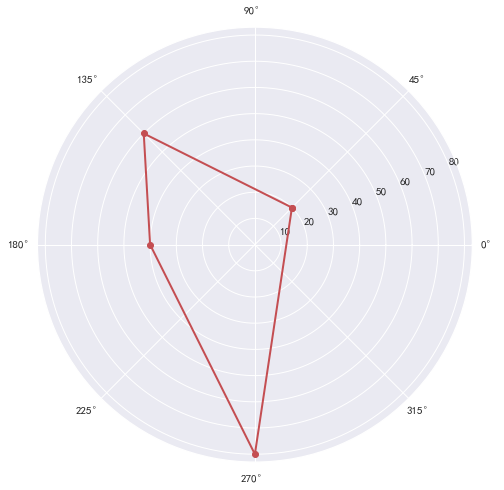

In [140]:
plt.figure(figsize=(10,8))
theta = np.array([0.25,0.75,1,1.5,.25])
r = [20,60,40,80,20]
plt.polar(theta*np.pi,r,'ro-',lw=2)

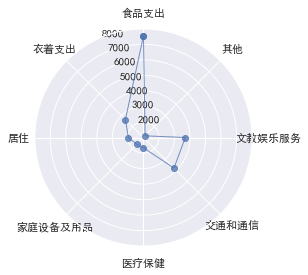

In [167]:
beijing=df3_4.T['北京'].values

name =df3_4.T.index   #标签
theta = np.linspace(0,2*np.pi,len(name),endpoint=False)    #将圆根据标签的个数等比分
theta = np.concatenate((theta,[theta[0]]))  #闭合
beijing = np.concatenate((beijing,[beijing[0]]))  #闭合

ax = plt.subplot(111,projection = 'polar')      #构建图例
ax.plot(theta,beijing,'o-',lw=1,alpha = 0.75)    #绘图
ax.set_thetagrids(theta*180/np.pi,name)         #替换标签
ax.set_ylim(1000,8000)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向

Text(0.5, 1.05, '天津')

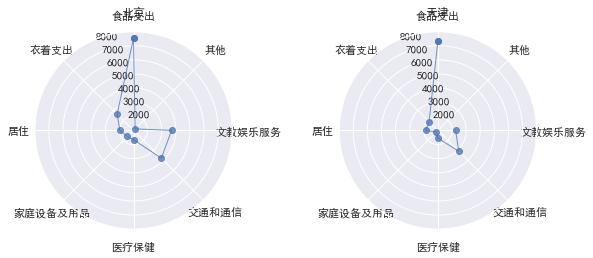

In [178]:
plt.figure(figsize=(10,8))

name =df3_4.T.index   #标签
theta = np.linspace(0,2*np.pi,len(name),endpoint=False)    #将圆根据标签的个数等比分
theta = np.concatenate((theta,[theta[0]]))  #闭合

theta = np.linspace(0,2*np.pi,len(name),endpoint=False)    #将圆根据标签的个数等比分
theta = np.concatenate((theta,[theta[0]]))  #闭合
beijing=df3_4.T['北京'].values
beijing = np.concatenate((beijing,[beijing[0]]))  #闭合

ax=plt.subplot(221,projection='polar')
ax.plot(theta,beijing,'o-',lw=1,alpha = 0.75)    #绘图
ax.set_thetagrids(theta*180/np.pi,name)         #替换标签
ax.set_ylim(1000,8000)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向
ax.set_title('北京')

tianjin=df3_4.T['天津'].values
tianjin=np.concatenate([tianjin,[tianjin[0]]])

ax=plt.subplot(222,projection='polar')
ax.plot(theta,tianjin,'o-',lw=1,alpha = 0.75)    #绘图
ax.set_thetagrids(theta*180/np.pi,name)         #替换标签
ax.set_ylim(1000,8000)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向
ax.set_title('天津')